## Segmentation of Credit Card Customers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [2]:
credit=pd.read_csv('CC_General.csv')
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
#Dropping CUST_ID as it is insignificant
credit=credit.drop('CUST_ID',axis=1)

In [4]:
credit.shape

(8950, 17)

In [5]:
credit.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0,0.000000,89.000000,468.637500,22500.00000


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [7]:
#Checking which variables have missing values
credit.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Missing Vlaue Treatment

In [8]:
credit['CREDIT_LIMIT']=credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median())
credit['MINIMUM_PAYMENTS']=credit['MINIMUM_PAYMENTS'].fillna(credit['CREDIT_LIMIT'].median())

In [9]:
credit.isnull().sum().any().sum()

0

### Deriving New KPI

#### 1.Monthly Average Purchase

In [10]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
credit['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

#### 2.Monthly Cash Advance Amount

In [11]:
credit['Monthli_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']
credit['Monthli_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthli_cash_advance, dtype: float64

#### 3.Purchases by type (one-off, installments)

In [12]:
credit[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


Above results shows that some customer choose to make oneoff purchases and some make installment purchases.So we will device a new feauture which will tell whether customer made oneff purchase ,installment purchase or neither.

In [13]:
def purchase(credit):
    
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [14]:
credit['purchase_type']=credit.apply(purchase,axis=1)
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

#### 4.Limit usage (balance to credit limit ratio)

In [15]:
credit['limit usuage']=credit['BALANCE']/credit['CREDIT_LIMIT']
credit['limit usuage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit usuage, dtype: float64

Above ratios tells whether customers are maintaining balance properly or not.Low value means good credit score

#### 5. Payments to minimum payments ratio

In [16]:
credit['payment_minipay']=credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']
credit['payment_minipay'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minipay, dtype: float64

In [17]:
pandas_profiling.ProfileReport(credit)

C:\Users\shekh\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,22
Number of observations,8950
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,176.0 B
Numeric,18
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [18]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
credit_new=credit[[x for x in credit.columns if x not in col]]

In [19]:
credit_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
Monthly_avg_purchase                8950 non-null float64
Monthli_cash_advance                8950 non-null float64
purchase_type                       8950 non-null object
limit usuage                        8950 non-null float64
payment_minipay                     8950 non-null float64
dtypes: float64(11), int64(2), object(1)
memory usage: 979.0+ KB


### Seperating Categorical And Numerical Data

In [20]:
credit_num=credit_new.select_dtypes(include=np.number)
credit_num.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthli_cash_advance,limit usuage,payment_minipay
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2,7.950000,0.000000,0.040901,1.446508
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0,0.000000,536.912124,0.457495,3.826241
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12,64.430833,0.000000,0.332687,0.991682
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1,124.916667,17.149001,0.222223,0.000000
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1,1.333333,0.000000,0.681429,2.771075


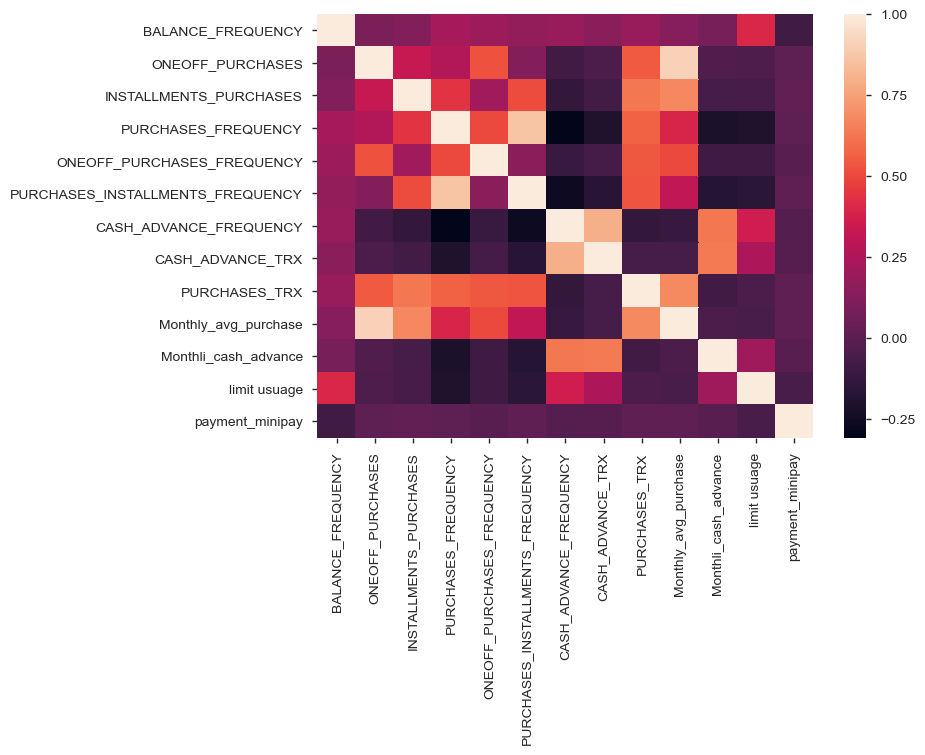

In [21]:
sns.heatmap(credit_num.corr())

In [22]:
credit_cat=credit_new.select_dtypes(include='object')
credit_cat.head()

,purchase_type
0,installment
1,none
2,one_off
3,one_off
4,one_off


### Outlier treatment for numerical Data

In [23]:
credit_num_log=np.log(credit_num +1)
credit_num_log.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthli_cash_advance,limit usuage,payment_minipay
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360


In [24]:
credit_num_log.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthli_cash_advance,limit usuage,payment_minipay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.351431
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.942329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.644607
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.103636
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.950266
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


### Handling Categorical Data

In [25]:
dummy=pd.get_dummies(credit_cat['purchase_type'],prefix='Purchase_type',drop_first=True)

In [26]:
dummy.head()

,Purchase_type_installment,Purchase_type_none,Purchase_type_one_off
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


#### Merging Numerical and categorical Data

In [27]:
credit_final=pd.concat([credit_num_log,dummy],axis=1)

In [28]:
credit_final.shape

(8950, 16)

In [29]:
credit_final.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthli_cash_advance,limit usuage,payment_minipay,Purchase_type_installment,Purchase_type_none,Purchase_type_one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.351431,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.942329,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.644607,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.103636,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.950266,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000


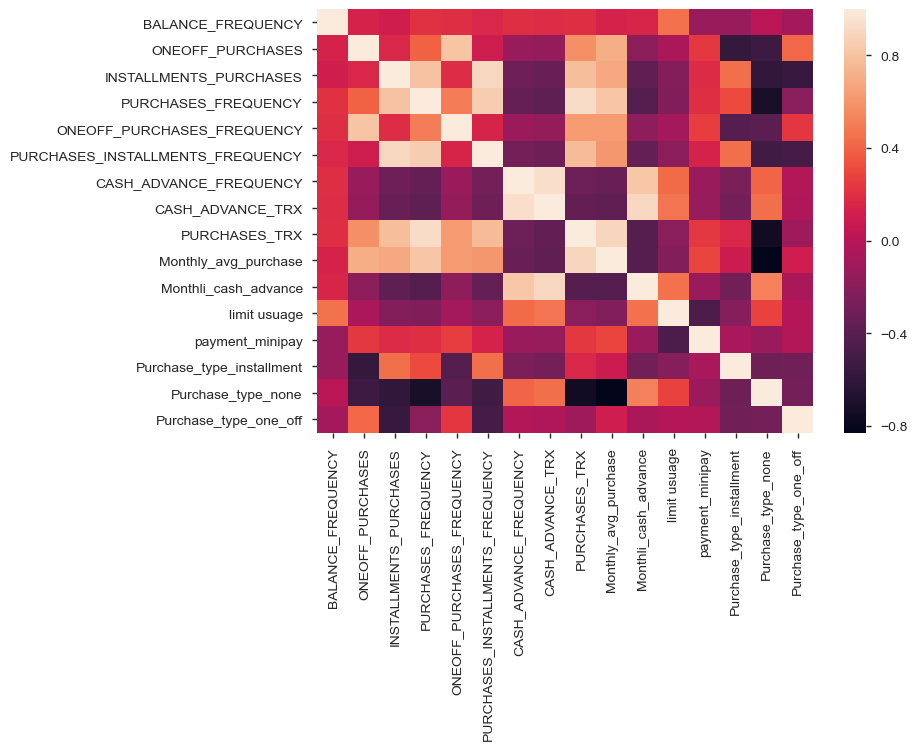

In [30]:
sns.heatmap(credit_final.corr())

#### Heat map shows that many features are co-related so applying dimensionality reduction

### Standarizing The Data

In [31]:
sc=StandardScaler()

In [32]:
credit_final_scaled=sc.fit_transform(credit_final)

In [33]:
var_ratio={}
for n in range(4,15):
    pca=PCA(n_components=n)
    credit_pca=pca.fit(credit_final_scaled)
    var_ratio[n]=sum(credit_pca.explained_variance_ratio_)

In [34]:
var_ratio

{4: 0.8203158531077712,
 5: 0.8809570281616899,
 6: 0.9197238942994508,
 7: 0.943020721204786,
 8: 0.9613516874196414,
 9: 0.9739441723217784,
 10: 0.9841367393443093,
 11: 0.9893758076702518,
 12: 0.9925946543064172,
 13: 0.9953261257766333,
 14: 0.9979164774740271}

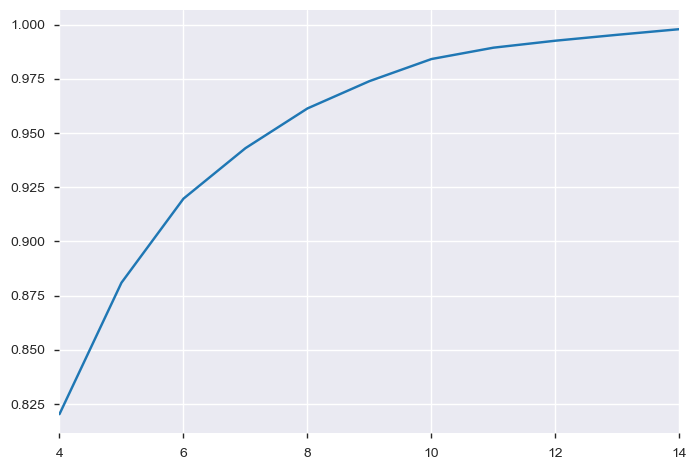

In [35]:
pd.Series(var_ratio).plot()

#### Since 5 components are able to express 88% variance

In [36]:
final_pca=PCA(n_components=5)
reduced_cr=final_pca.fit_transform(credit_final_scaled)

In [37]:
reduced_cr_df=pd.DataFrame(reduced_cr)
reduced_cr_df.head()

,0,1,2,3,4
0,-0.053612,-2.542262,-0.858158,-0.525077,0.368043
1,3.949449,-0.246155,0.375601,0.860297,-0.798422
2,-1.469597,2.454880,-2.017081,-1.574845,-0.089458
3,0.895588,1.296821,-2.201730,-1.129811,1.536391
4,1.269362,0.366775,-2.209061,-1.762592,-0.109179


In [38]:
reduced_cr_df.shape

(8950, 5)

In [39]:
pd.DataFrame(final_pca.components_.T,columns=['PC_'+str(i) for i in range(0,5)],index=credit_final.columns)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,-0.019354,0.208744,0.332926,-0.335877,-0.364449
ONEOFF_PURCHASES,-0.199711,0.468835,-0.134649,0.016062,-0.036775
INSTALLMENTS_PURCHASES,-0.315595,-0.141475,0.299419,0.095008,-0.024938
PURCHASES_FREQUENCY,-0.354119,0.029401,0.198749,-0.006267,0.040982
ONEOFF_PURCHASES_FREQUENCY,-0.204633,0.418034,-0.062636,0.068373,-0.184561
PURCHASES_INSTALLMENTS_FREQUENCY,-0.302408,-0.149689,0.318814,0.049599,-0.025881
CASH_ADVANCE_FREQUENCY,0.235712,0.219425,0.337030,0.208832,0.298593
CASH_ADVANCE_TRX,0.252017,0.220401,0.341986,0.207697,0.273418
PURCHASES_TRX,-0.359213,0.129825,0.157638,0.010779,0.038910
Monthly_avg_purchase,-0.350714,0.192919,0.043837,0.003212,0.157858


In [40]:
#Variance Explained by each component
pd.Series(final_pca.explained_variance_ratio_,index=['PC_'+str(i) for i in range(0,5)])

PC_0    0.405247
PC_1    0.179940
PC_2    0.152757
PC_3    0.082372
PC_4    0.060641
dtype: float64

### CLUSTERING
#### Finding optimal number of clusters.

#### 1.Dendograms

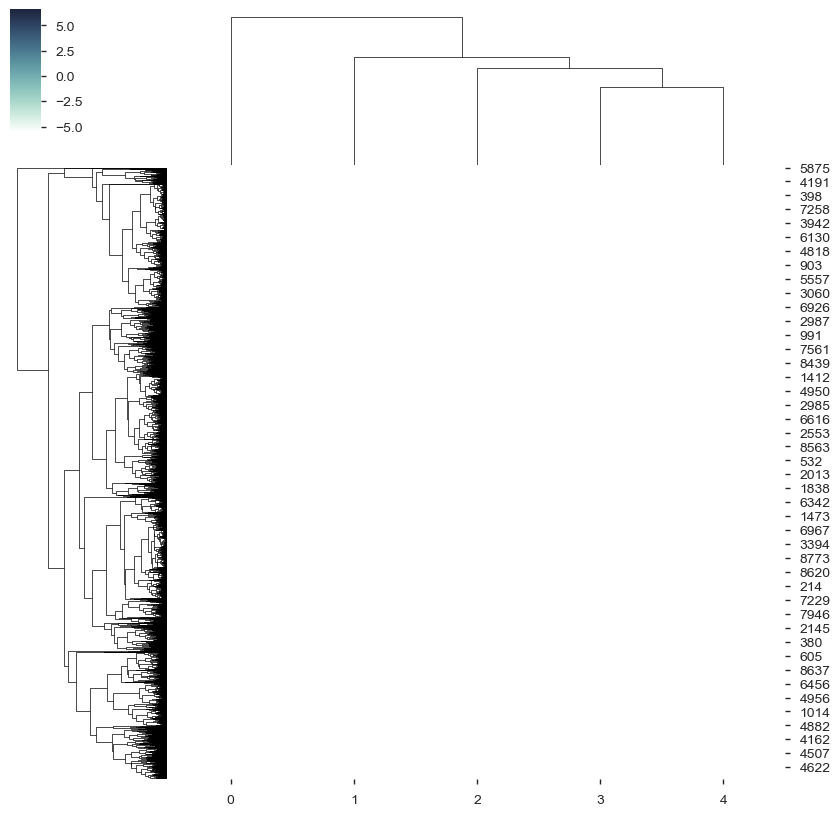

In [41]:
# Dendogram
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(reduced_cr, cmap=cmap, linewidths=.5)

The dendograms shows there are 5 distinct clusters

#### 2. Elbow Analysis

In [42]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )

In [43]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,126153.046433
1,2,81387.530564
2,3,61399.211695
3,4,45507.302330
4,5,37619.309246
5,6,32934.897261
6,7,30219.264135
7,8,27956.510675
8,9,25467.999169
9,10,23391.808980


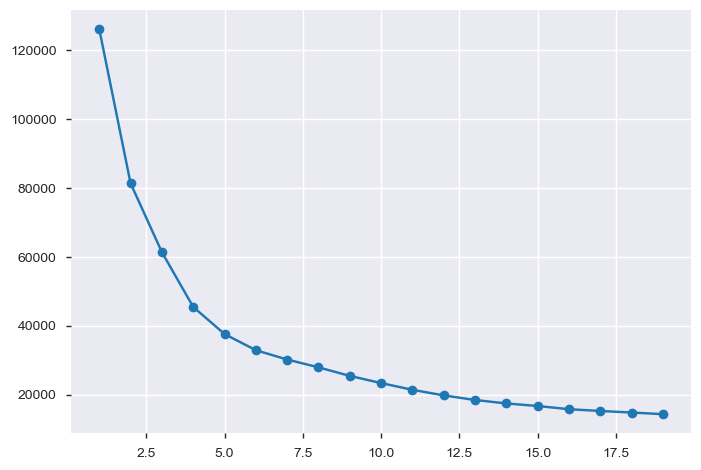

In [44]:
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

From elbow plot analysis we can say optimum clusters may be 4 or 5

Based on the type of purchase made by the customers and their distinctive behaviour exhibitted based on purchase_type as we saw on KPI insight.We are first going with 4 clusters and then will analyse with 5 clusters.

In [45]:
km=KMeans(n_clusters=4,random_state=546)

In [46]:
km.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=546, tol=0.0001, verbose=0)

In [47]:
km.labels_

array([3, 0, 2, ..., 3, 0, 2])

In [48]:
pd.Series(km.labels_).value_counts()

1    2612
3    2304
0    2105
2    1929
dtype: int64

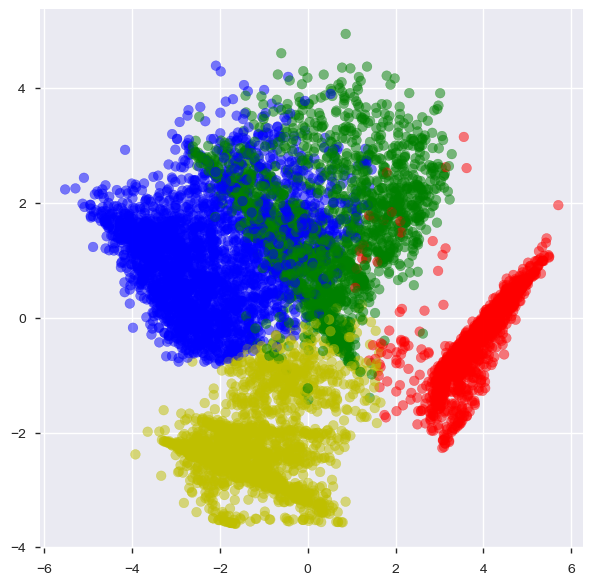

In [49]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

C:\Users\shekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\shekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\shekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shekh\Anaconda3\lib\site-packages\statsmodels\no

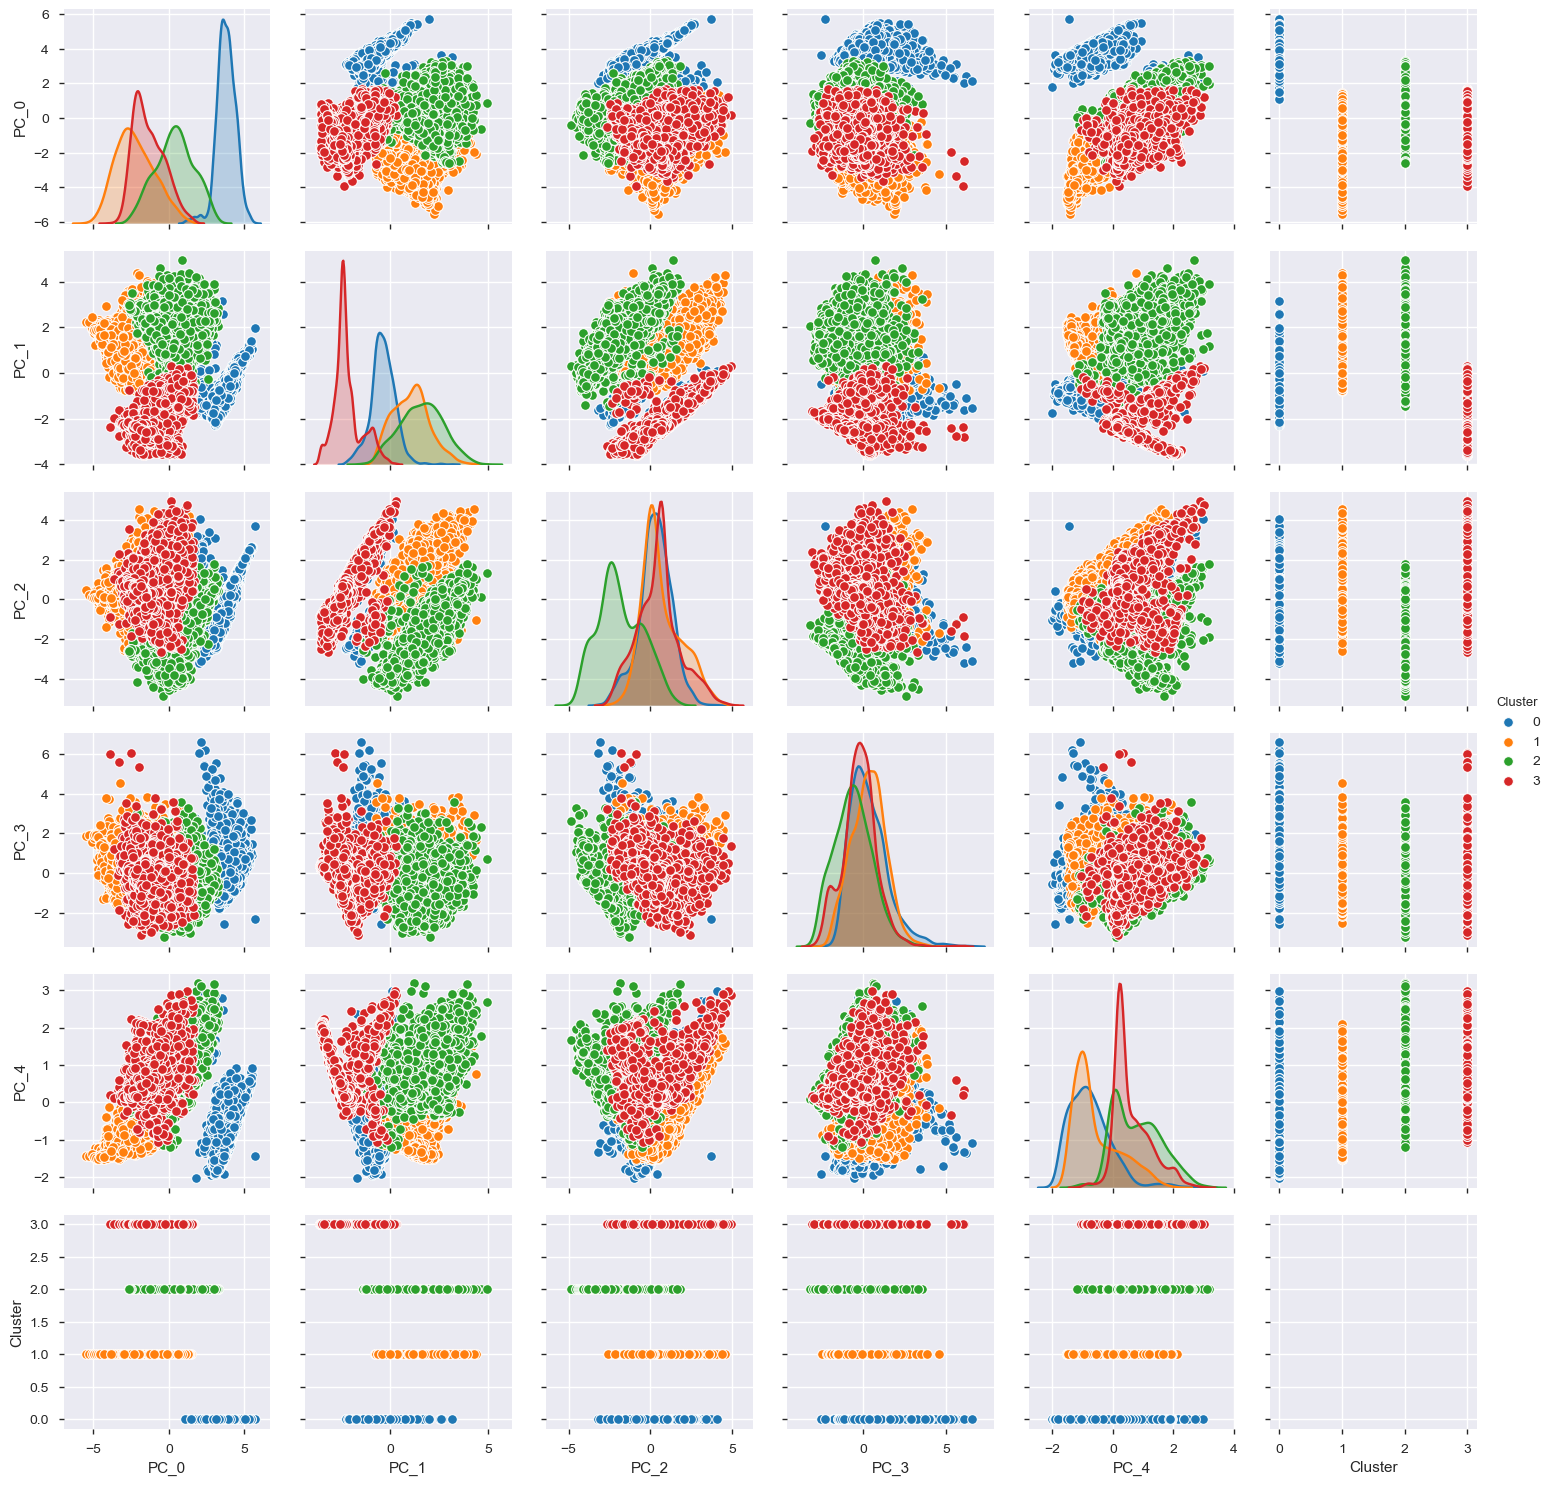

In [50]:
pp=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])
pp['Cluster']=km.labels_
#pairwise relationship of components on the data
sns.pairplot(pp,hue='Cluster')

In [51]:
#Getting the non logged data set
orig_df=pd.concat([credit_num,dummy],axis=1)
orig_df.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthli_cash_advance,limit usuage,payment_minipay,Purchase_type_installment,Purchase_type_none,Purchase_type_one_off
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2,7.950000,0.000000,0.040901,1.446508,1,0,0
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0,0.000000,536.912124,0.457495,3.826241,0,1,0
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12,64.430833,0.000000,0.332687,0.991682,0,0,1
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1,124.916667,17.149001,0.222223,0.000000,0,0,1
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1,1.333333,0.000000,0.681429,2.771075,0,0,1


In [52]:
#Dropping these variables which are insignificant due to new formed KPIs
orig_df=orig_df.drop(['BALANCE_FREQUENCY','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
             'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
             ],axis=1)

In [53]:
cluster_labels=pd.Series(km.labels_,name='CLUSTER')
cluster_labels.head()

0    3
1    0
2    2
3    2
4    2
Name: CLUSTER, dtype: int32

In [54]:
# Conactenating labels found through Kmeans with data 
cluster_df=pd.concat([orig_df,cluster_labels],axis=1)
cluster_df.head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthli_cash_advance,limit usuage,payment_minipay,Purchase_type_installment,Purchase_type_none,Purchase_type_one_off,CLUSTER
0,0,2,7.950000,0.000000,0.040901,1.446508,1,0,0,3
1,4,0,0.000000,536.912124,0.457495,3.826241,0,1,0,0
2,0,12,64.430833,0.000000,0.332687,0.991682,0,0,1,2
3,1,1,124.916667,17.149001,0.222223,0.000000,0,0,1,2
4,0,1,1.333333,0.000000,0.681429,2.771075,0,0,1,2


In [55]:
cluster_df=cluster_df.rename({'Monthli_cash_advance':'Monthly_cash_advance'},axis=1)

In [56]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df.groupby('CLUSTER').apply(lambda x: x[cluster_df.columns.difference(['CLUSTER'])].mean()).T
cluster_4

CLUSTER,0,1,2,3
CASH_ADVANCE_TRX,6.577197,2.878637,2.835666,0.973524
Monthly_avg_purchase,0.264991,204.999797,65.872311,46.954356
Monthly_cash_advance,186.925568,69.035505,77.266211,31.904241
PURCHASES_TRX,0.079810,34.931853,6.666667,11.884983
Purchase_type_installment,0.019002,0.000000,0.000000,0.963542
Purchase_type_none,0.970071,0.000000,0.000000,0.000000
Purchase_type_one_off,0.003325,0.002680,0.964230,0.000000
limit usuage,0.576442,0.360531,0.379765,0.257303
payment_minipay,9.869949,7.552264,5.318143,13.033302


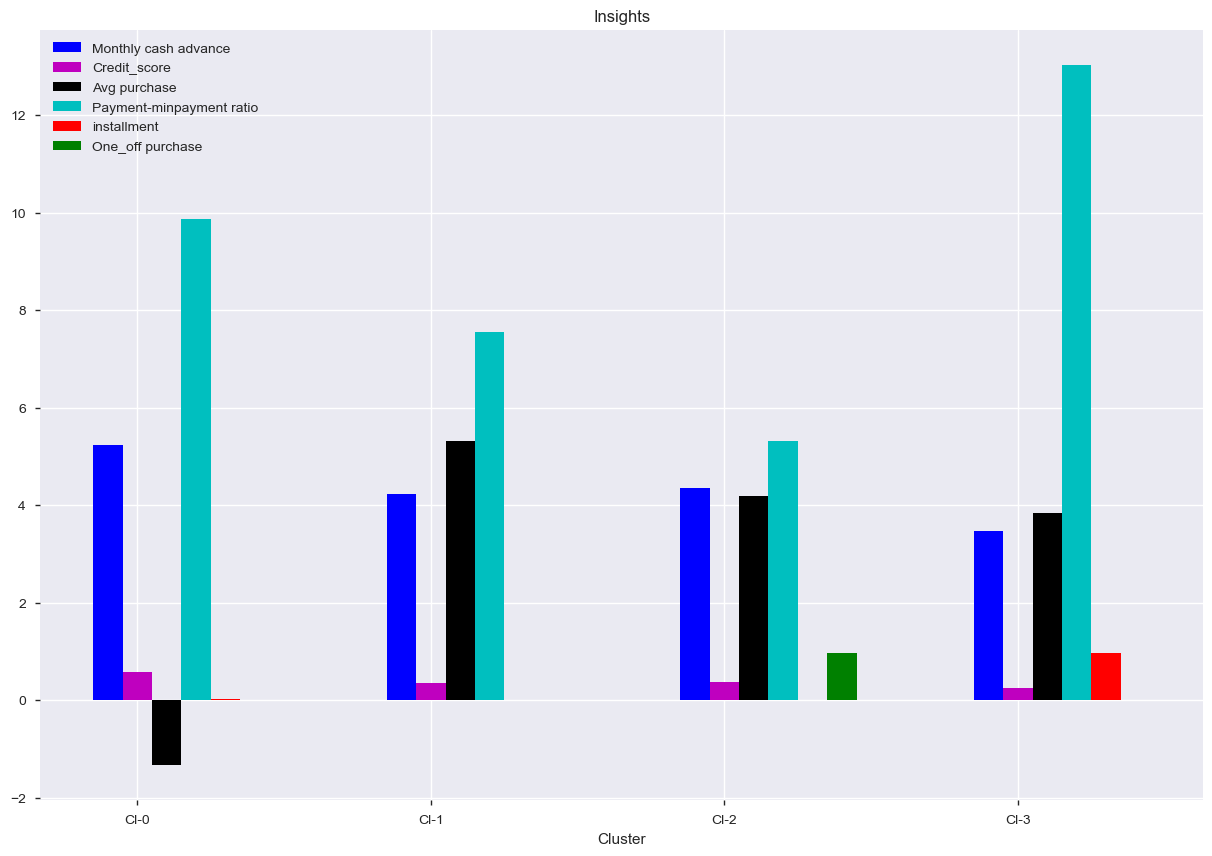

In [57]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit usuage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minipay',:].values
installment=cluster_4.loc['Purchase_type_installment',:].values
one_off=cluster_4.loc['Purchase_type_one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [58]:
print(cluster_df.CLUSTER.value_counts(),'\n')
print('-----------------Percentage of customer in each cluster-----------------')
print('CLUSTER 0 : ',round((2105/cluster_df.shape[0])*100,2))
print('CLUSTER 1 : ',round((2612/cluster_df.shape[0])*100,2))
print('CLUSTER 2 : ',round((1929/cluster_df.shape[0])*100,2))
print('CLUSTER 3 : ',round((2304/cluster_df.shape[0])*100,2))

1    2612
3    2304
0    2105
2    1929
Name: CLUSTER, dtype: int64 

-----------------Percentage of customer in each cluster-----------------
CLUSTER 0 :  23.52
CLUSTER 1 :  29.18
CLUSTER 2 :  21.55
CLUSTER 3 :  25.74


=> Cluster 0 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no      purchase transaction. This group is about 23% of the total customer base.

=> Cluster 1 is the group of customers who have highest Monthly_avg purchases.They have comparatively good credit score. This      group is about 29% of the total customer base

=> Cluster 2 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side. This        group is about 21% of the total customer base.

=> Cluster 3 customers have minimum credit score and are doing maximum installment purchases.There average monthly purchase is    also decent. This group is about 25% of the total customer base

### Finding Behaviour With 5 Clusters

In [59]:
km_5=KMeans(n_clusters=5)
km_5=km_5.fit(reduced_cr)
pd.Series(km_5.labels_).value_counts()

0    2068
2    2060
3    1936
1    1749
4    1137
dtype: int64

Text(0, 0.5, 'PC_1')

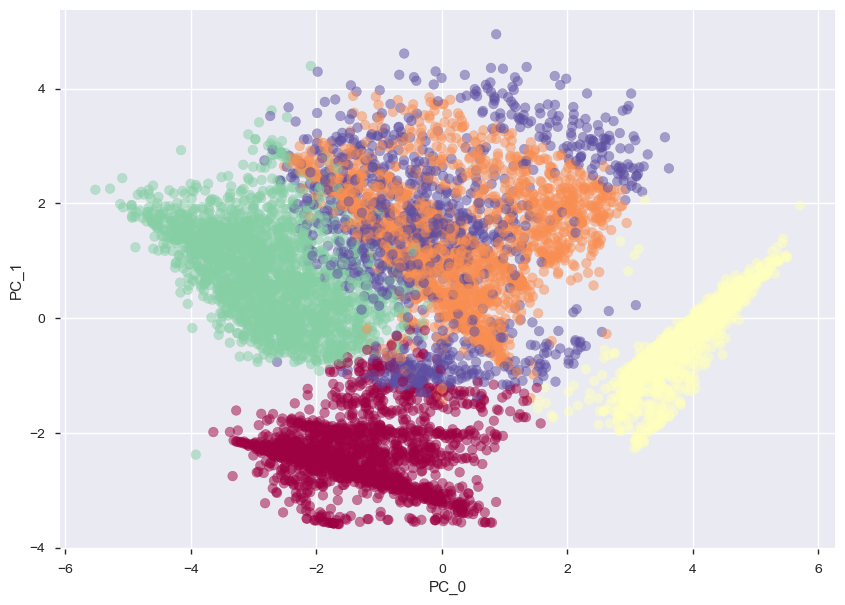

In [60]:
plt.figure(figsize=(10,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [61]:
cluster5_df=pd.concat([orig_df,pd.Series(km_5.labels_,name='CLUSTER')],axis=1)
cluster5_df.head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthli_cash_advance,limit usuage,payment_minipay,Purchase_type_installment,Purchase_type_none,Purchase_type_one_off,CLUSTER
0,0,2,7.950000,0.000000,0.040901,1.446508,1,0,0,0
1,4,0,0.000000,536.912124,0.457495,3.826241,0,1,0,2
2,0,12,64.430833,0.000000,0.332687,0.991682,0,0,1,1
3,1,1,124.916667,17.149001,0.222223,0.000000,0,0,1,1
4,0,1,1.333333,0.000000,0.681429,2.771075,0,0,1,1


In [62]:
cluster_5=cluster5_df.groupby('CLUSTER').apply(lambda x: x[cluster5_df.columns.difference(['CLUSTER'])].mean()).T
cluster_5

CLUSTER,0,1,2,3,4
CASH_ADVANCE_TRX,0.169729,1.551172,6.317961,0.247417,11.010554
Monthli_cash_advance,7.758068,46.005835,183.403846,7.118525,271.109653
Monthly_avg_purchase,45.999503,63.045677,0.014289,228.330589,108.879931
PURCHASES_TRX,11.552224,6.205832,0.009709,37.233988,21.815303
Purchase_type_installment,0.964700,0.000000,0.006311,0.000517,0.220756
Purchase_type_none,0.000000,0.000000,0.991262,0.000000,0.000000
Purchase_type_one_off,0.000000,0.966266,0.002427,0.010847,0.138962
limit usuage,0.211070,0.356860,0.574163,0.268392,0.631033
payment_minipay,10.900932,5.193168,10.013047,12.748939,3.390836


=> We have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

=> Cluster 0 and Cluster 4 have cash transactions on higher side
#### So we don't have quite distinguishable characteristics with 5 clusters

#### Checking Performance Metrics For Kmeans with Calinski harabaz and Silhouette score

In [63]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

C:\Users\shekh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shekh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shekh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shekh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.p

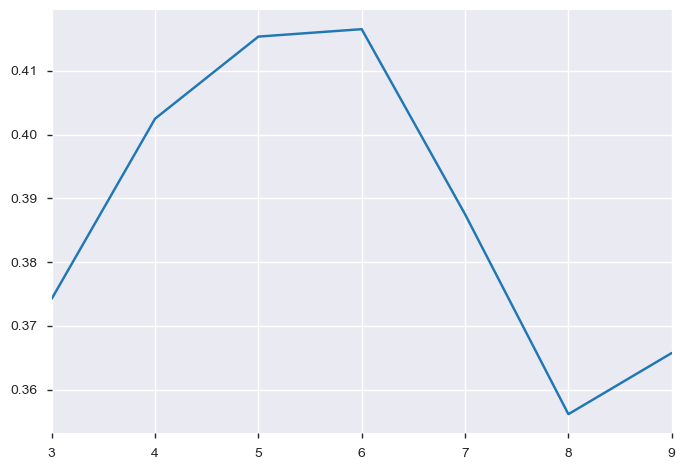

In [64]:
pd.Series(score).plot()

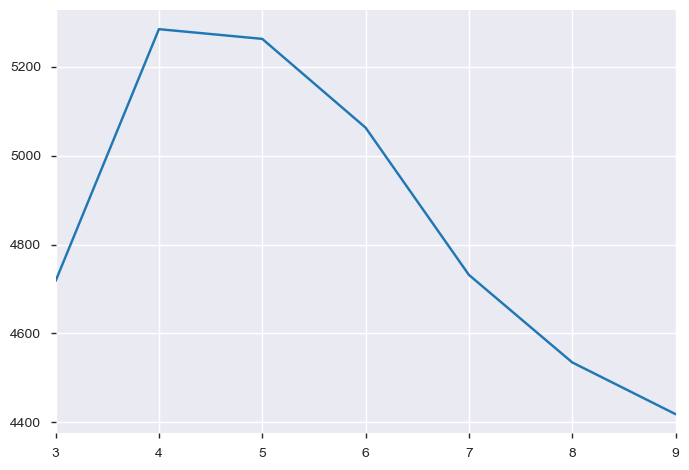

In [65]:
pd.Series(score_c).plot()

Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster

### Marketing Strategy Suggested :

#### CLUSTER 0 : (23.52%) They are taking maximum advance_cash and is having very less avg monthly purchase and poor credit_score & doing no purchase transaction. We can target them by providing less interest rate on purchase transaction.

#### CLUSTER 1 : (29.18%) This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. Giving rewards point will make them perform more purchases.

#### CLUSTER 2 : (21.55%) These Customers are doing maximum One_Off transactions and least payment ratio (may be for utility bills only). This group seems to be risky group.

#### CLUSTER 3 : (25.74%) They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )  we can increase credit limit or can lower down interest rate. Can be given premium card /loyality cards to increase transactions.